## 210968002 Sagar Kumar
## Week 6
## Exercise 1 – Time Series Analysis 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
df = pd.read_csv("employment.csv")
# Can use read_csv(parse_date=True, index_col="datestamp")

In [18]:
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


### Q1) Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.

In [19]:
df["datestamp"] = pd.to_datetime(df["datestamp"])
df.set_index("datestamp", inplace=True)

In [20]:
df.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01'],
              dtype='datetime64[ns]', name='datestamp', length=122, freq=None)

In [21]:
df.isna().any()  # Implies there are no null values in this dataset

Agriculture                       False
Business services                 False
Construction                      False
Durable goods manufacturing       False
Education and Health              False
Finance                           False
Government                        False
Information                       False
Leisure and hospitality           False
Manufacturing                     False
Mining and Extraction             False
Nondurable goods manufacturing    False
Other                             False
Self-employed                     False
Transportation and Utilities      False
Wholesale and Retail Trade        False
dtype: bool

### Q2) Generate a boxplot to find the distribution of unemployment rate for every industry.

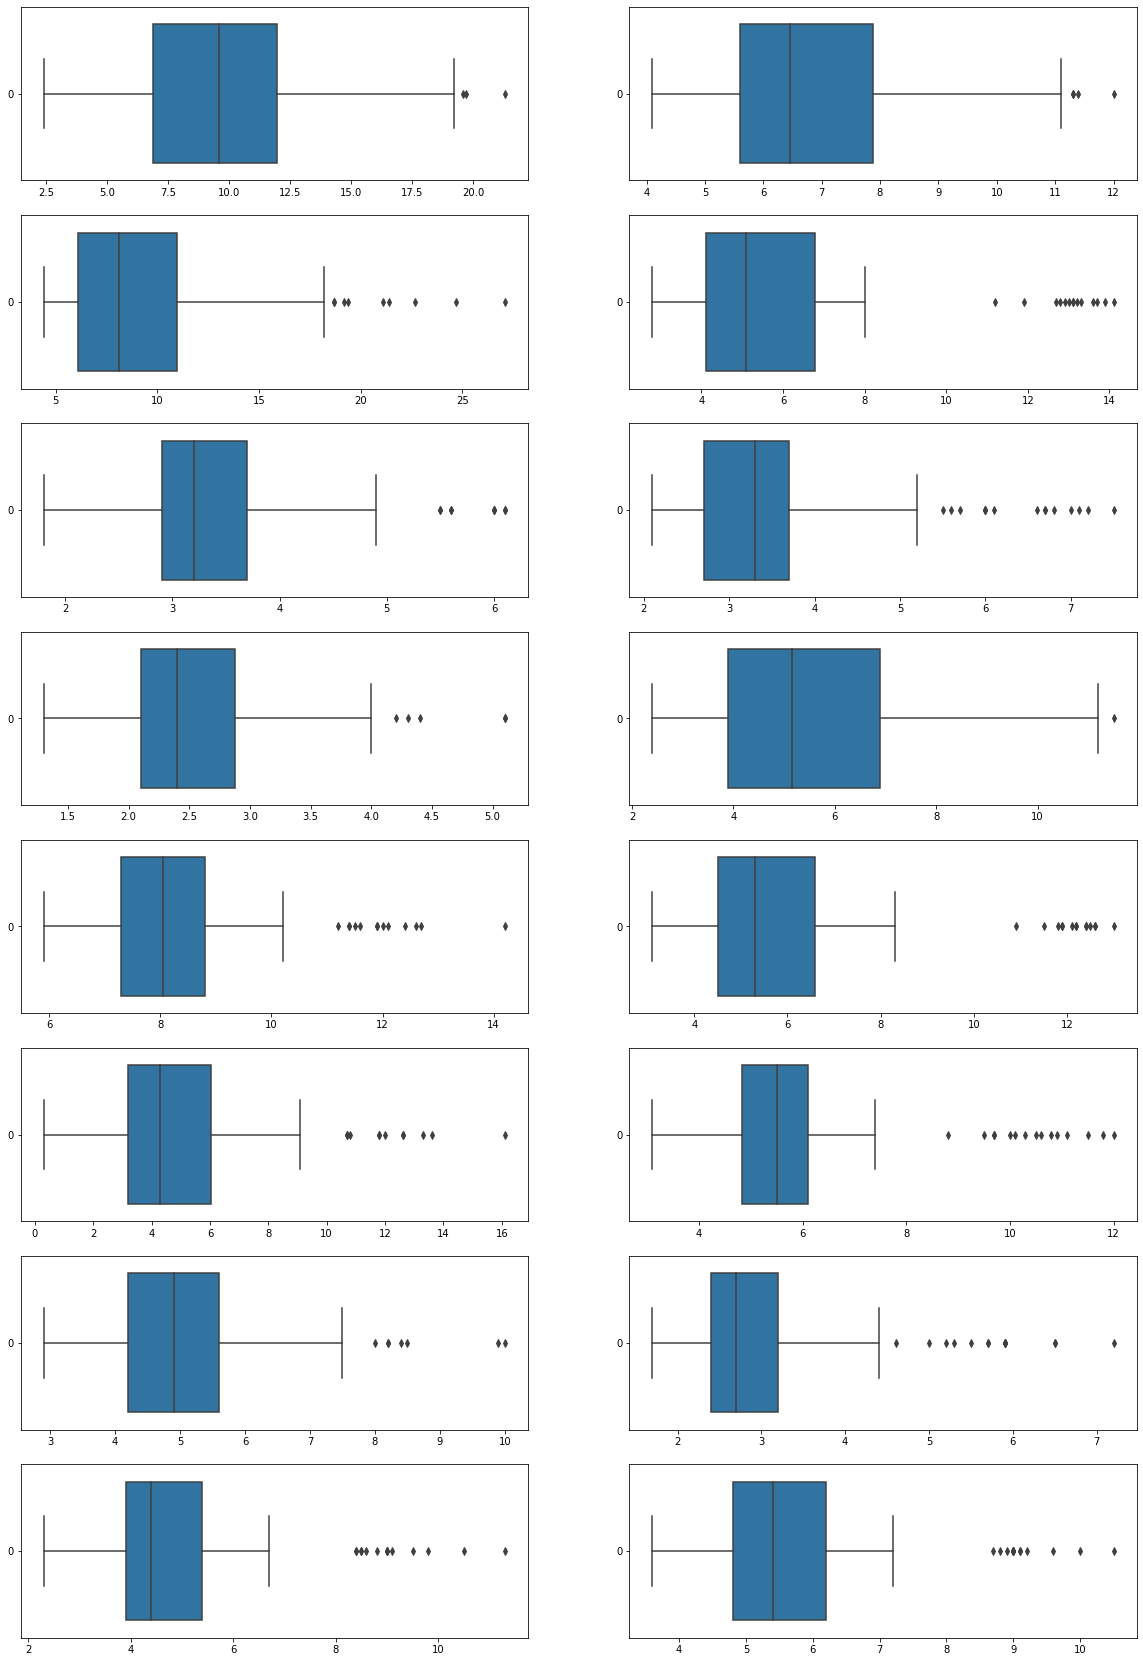

In [22]:
fig,axs=plt.subplots(8, 2, figsize=(20,30))
j = 0
for z in range(0,8):
    for y in range(0,2):
        sns.boxplot(data=df[df.columns[j]], ax=axs[z][y], orient='h')
        j=j+1

### Q3) Using line chart Visualize the unemployment rate of workers by industry

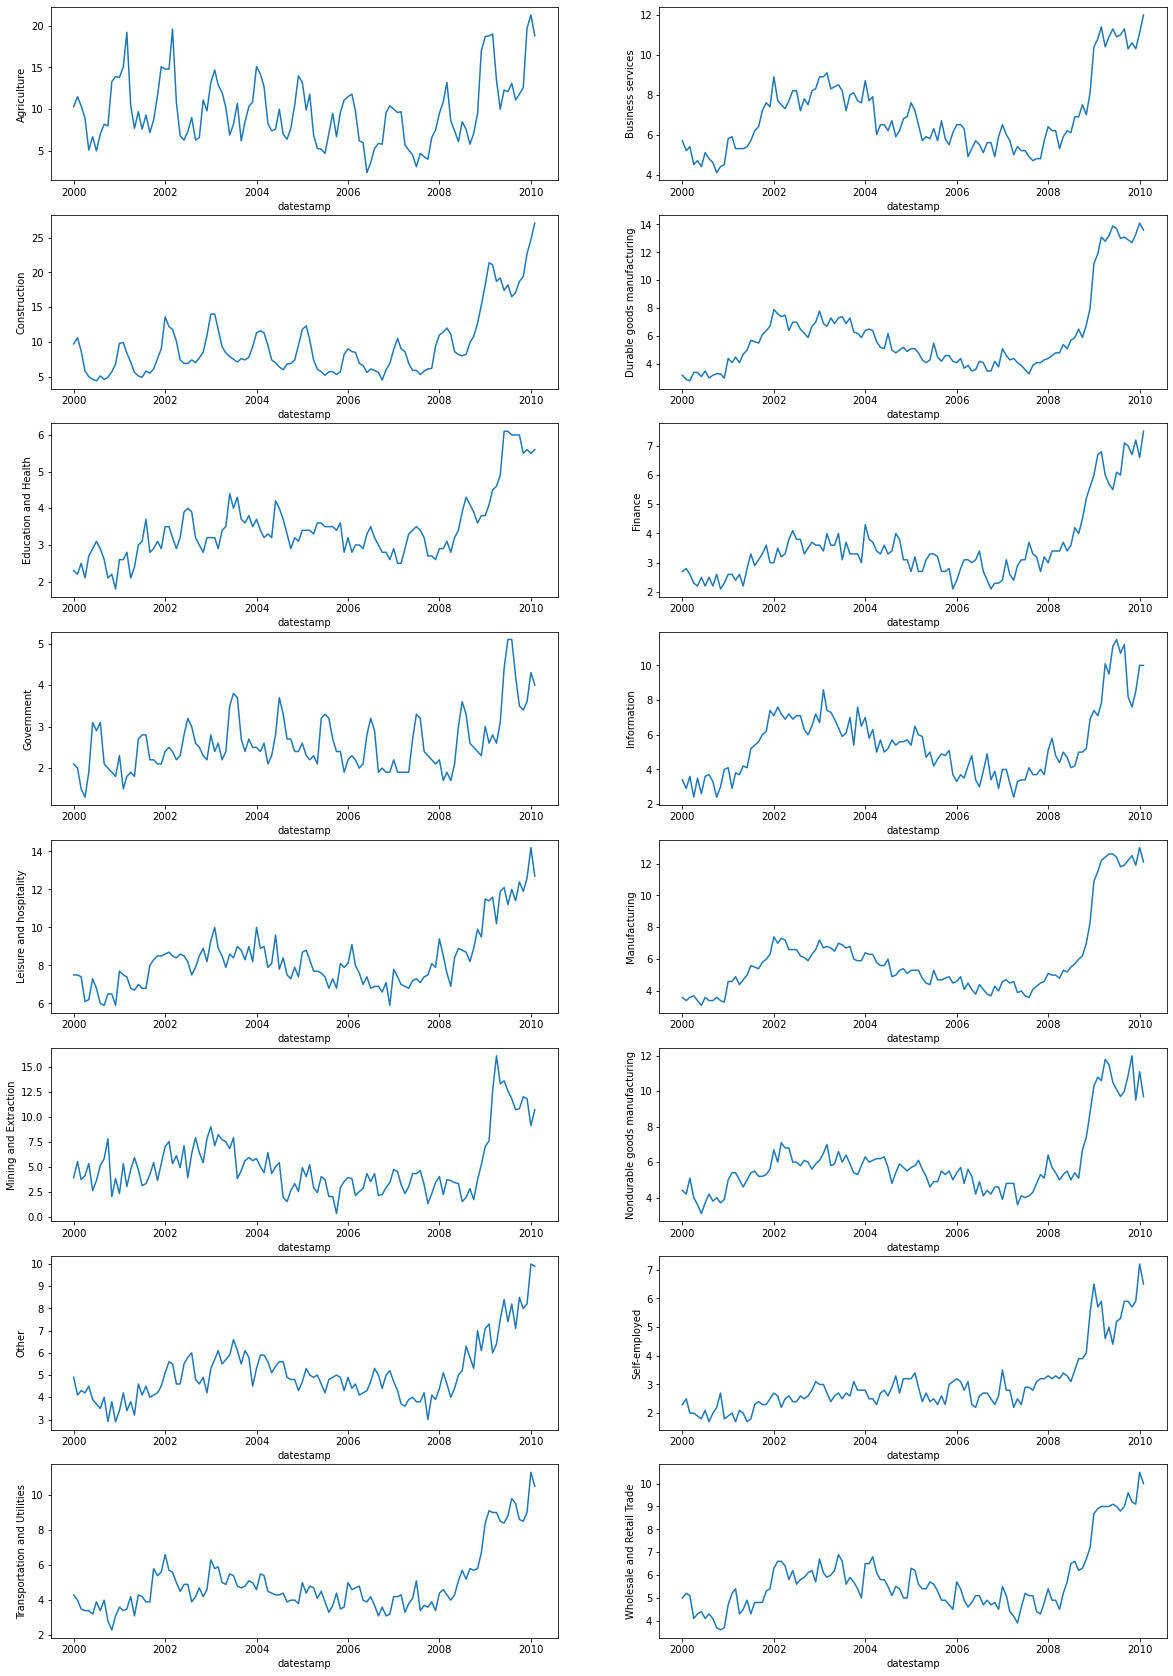

In [23]:
fig, axs = plt.subplots(8, 2, figsize=(20,30))
j = 0
for z in range(0,8):
    for y in range(0,2):
        sns.lineplot(data=df[df.columns[j]],ax=axs[z][y])
        j=j+1

### 4) Plot the monthly and yearly trends.

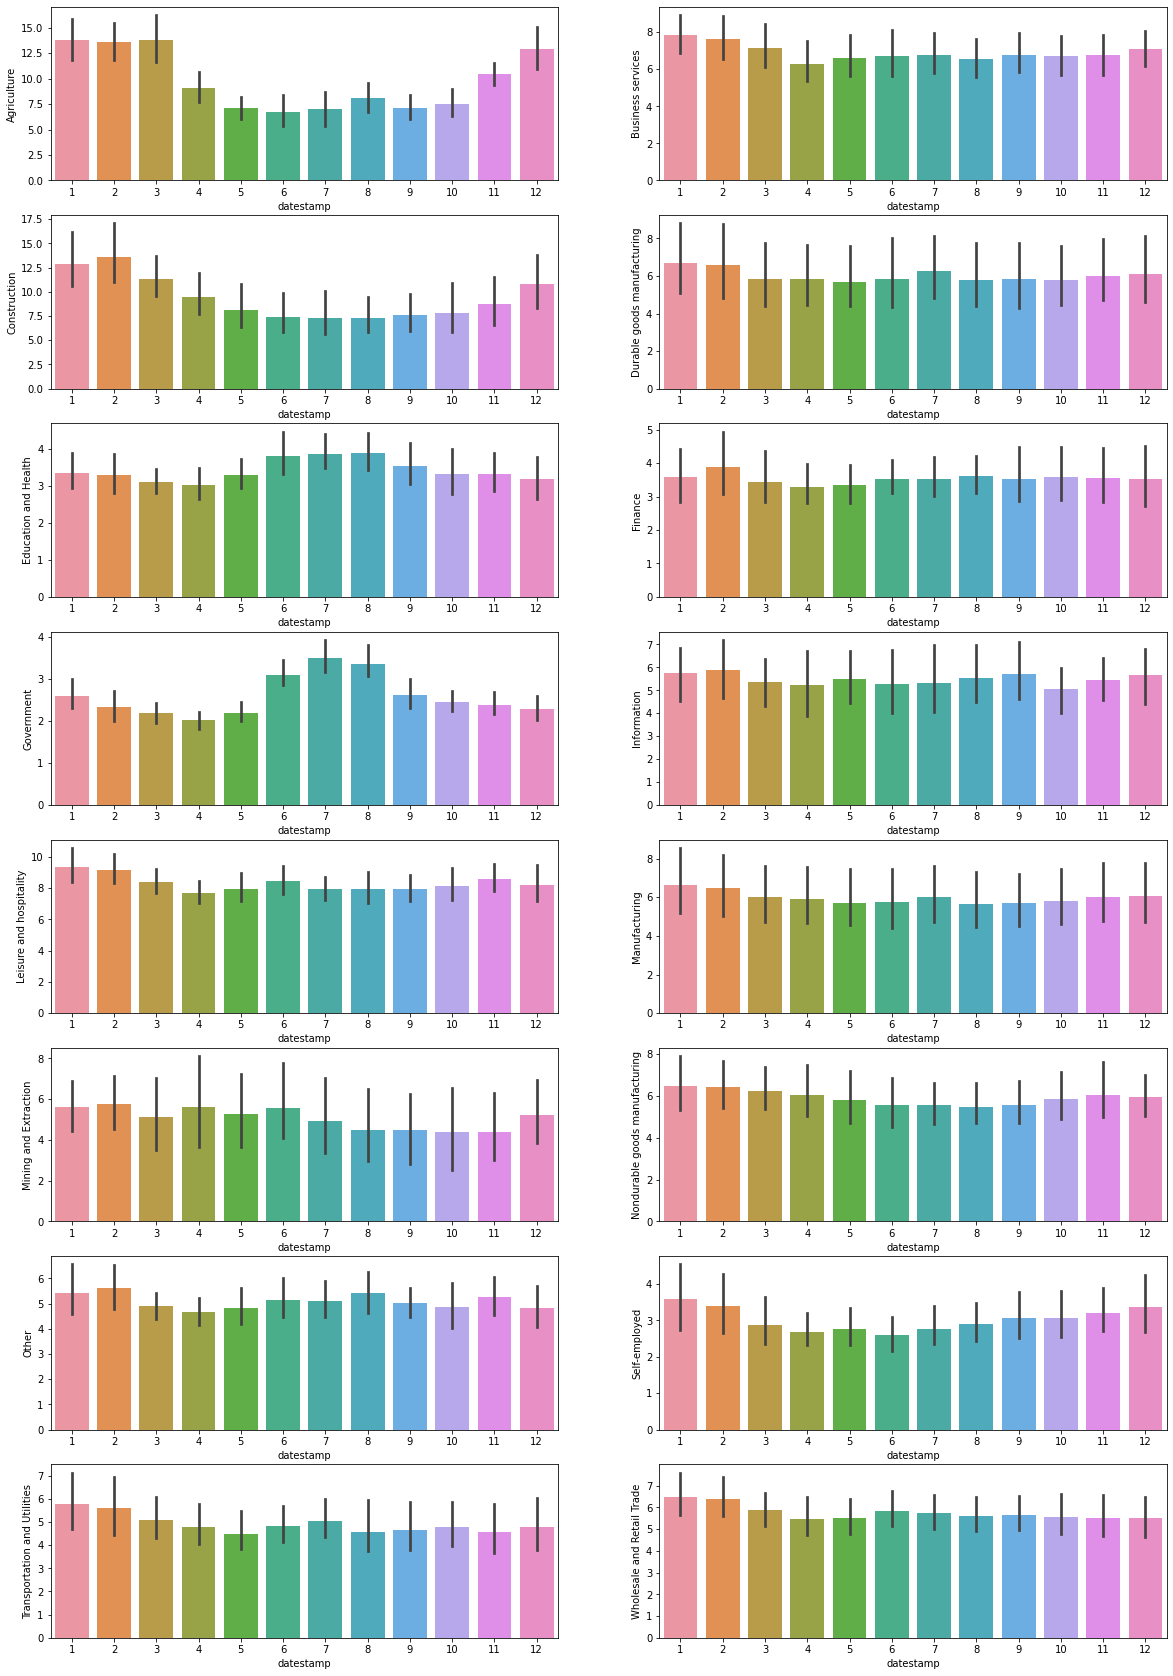

In [24]:
fig, axs = plt.subplots(8, 2, figsize=(20,30))
count = 0
for z in range(0,8):
    for y in range(0,2):
        sns.barplot(y=df[df.columns[j]], x=df.index.month, ax=axs[z][y])
        count += 1

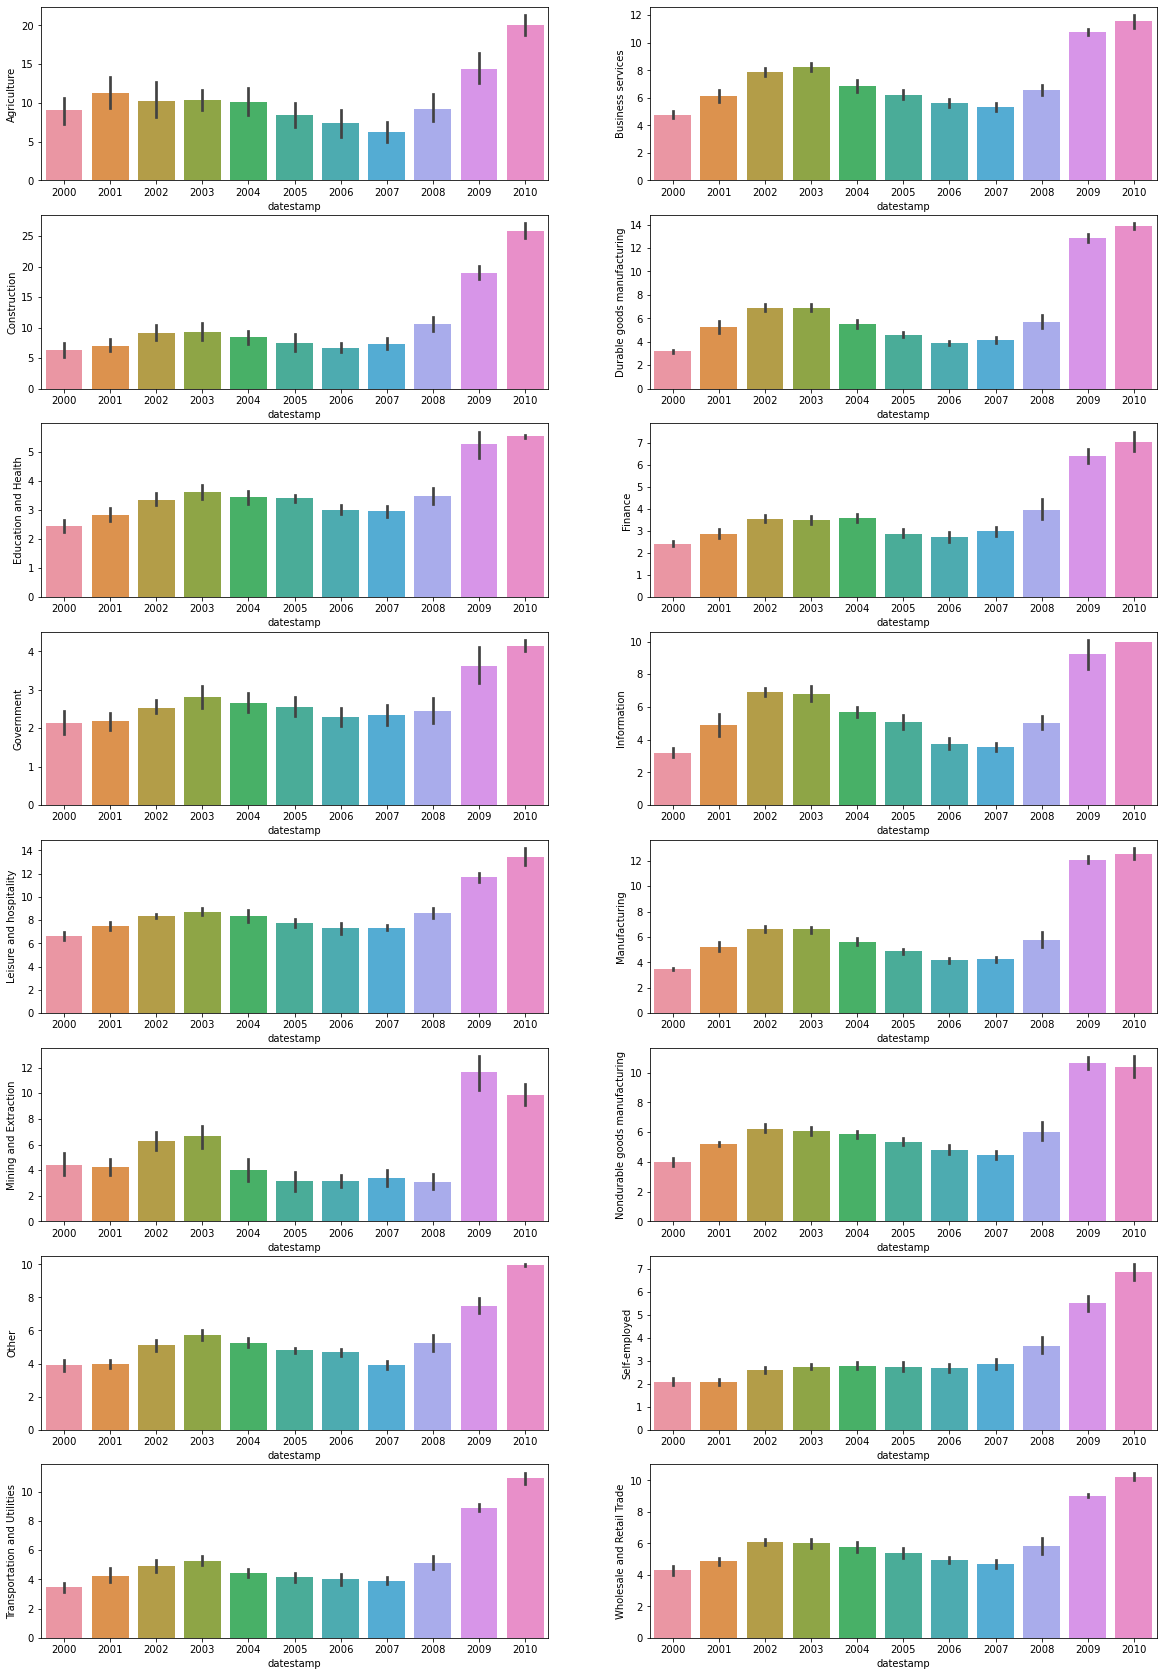

In [25]:
fig, axs = plt.subplots(8, 2, figsize=(20,30))
count = 0
for z in range(0,8):
    for y in range(0,2):
        sns.barplot(y=df[df.columns[j]], x=df.index.year, ax=axs[z][y])
        count += 1

### 5) Apply time series decomposition to your dataset to visualize the trend and seasonality
### 6) Visualize the seasonality of Agriculture, Health and Finance sector.

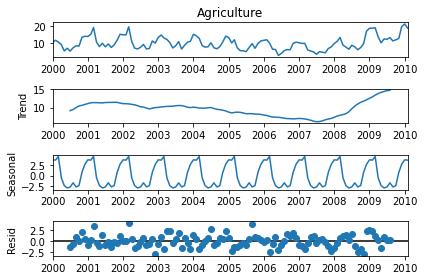

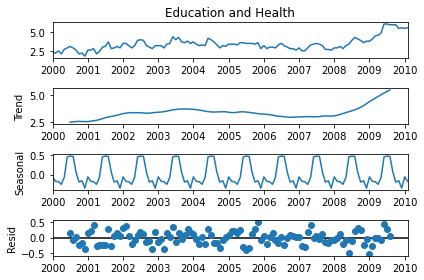

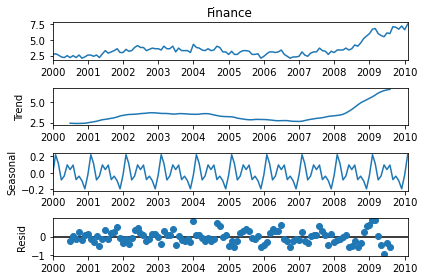

In [27]:
count = 0
lst = ['Agriculture', 'Education and Health', 'Finance']
for z in range(0, 3):
    result = seasonal_decompose(df[lst[count]], model='additive').plot()
    plt.show()
    count += 1